<a href="https://colab.research.google.com/github/hidemet/mldm-credit-card-risk/blob/main/myCopy_ProgettoMLDM_Dumas_Rossini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 1. Caricamento e divisione del Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
Existing_Account_Status: Stato del conto corrente esistente.
Credit_Duration_Month: Durata del credito in mesi.
Credit_History: Stato della storia del credito.
Credit_Purpose: Motivo del credito.
Credit_Amount: Importo del credito.
Saving_Account_Status: Stato del conto di risparmio/obbligazioni.
Employment_Length: Durata dell'impiego attuale.
Installment_Rate: Tasso di rimborso come percentuale del reddito disponibile.
Personal_Status_Sex: Stato personale e sesso.
Other_Debtors_Guarantors: Altri debitori/garanti.
Residence_Length: Durata della residenza attuale.
Property_Type: Tipo di proprietà.
Age: Età (in anni).
Other_Installment_Plans: Altri piani di rateizzazione.
Housing_Type: Tipo di alloggio.
Existing_Credits_Count: Numero di crediti esistenti presso questa banca.
Job_Type: Tipo di lavoro.
Dependents_Count: Numero di persone a carico.
Telephone: Presenza di telefono (sì/no o binario).
Foreign_Worker: Lavoratore straniero (sì/no o binario).
Credit_Risk (o Good_Bad_Credit): Rischio di credito (buono/cattivo, spesso 1/2 o 0/1).
"""
names = [
    "Existing_Account_Status",
    "Credit_Duration_Month",
    "Credit_History",
    "Credit_Purpose",
    "Credit_Amount",
    "Savings_Account_Status",
    "Employment_Length",
    "Installment_Rate",
    "Personal_Status_Sex",
    "Other_Debtors_Guarantors",
    "Residence_Length",
    "Property_Type",
    "Age",
    "Other_Installment_Plans",
    "Housing_Type",
    "Existing_Credits_Count",
    "Job_Type",
    "Dependents_Count",
    "Telephone",
    "Foreign_Worker",
    "Credit_Risk"  # nostro target
]


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/german.data", sep=" ", header= None, names = names)
df

,Existing_Account_Status,Credit_Duration_Month,Credit_History,Credit_Purpose,Credit_Amount,Savings_Account_Status,Employment_Length,Installment_Rate,Personal_Status_Sex,Other_Debtors_Guarantors,...,Property_Type,Age,Other_Installment_Plans,Housing_Type,Existing_Credits_Count,Job_Type,Dependents_Count,Telephone,Foreign_Worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
X = df.drop('Credit_Risk', axis=1)
y = df['Credit_Risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)  # Dovrebbe essere (800, 20)
print("X_test shape:", X_test.shape)   # Dovrebbe essere (200, 20)
print("y_train shape:", y_train.shape)   # Dovrebbe essere (800,)
print("y_test shape:", y_test.shape)    # Dovrebbe essere (200,)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


## 2. Analisi Esplorativa (EDA)

In [ ]:
print("Statistiche descrittive:")
print(X_train.describe())
X_train.describe()
X_train
# Dovremmo osservando le statistiche riuscire ad individuare dei possibili outlier o variaili che hanno una distribuzione molto asimmetrica.

Statistiche descrittive:
       Credit_Duration_Month  Credit_Amount  Installment_Rate  \
count             800.000000     800.000000        800.000000   
mean               21.095000    3360.618750          2.965000   
std                11.807211    2898.174863          1.122653   
min                 4.000000     250.000000          1.000000   
25%                12.000000    1380.000000          2.000000   
50%                18.000000    2333.000000          3.000000   
75%                24.000000    4154.500000          4.000000   
max                60.000000   18424.000000          4.000000   

       Residence_Length         Age  Existing_Credits_Count  Dependents_Count  
count        800.000000  800.000000              800.000000        800.000000  
mean           2.846250   35.558750                1.411250          1.143750  
std            1.105277   11.411587                0.578828          0.351056  
min            1.000000   19.000000                1.000000          

,Existing_Account_Status,Credit_Duration_Month,Credit_History,Credit_Purpose,Credit_Amount,Savings_Account_Status,Employment_Length,Installment_Rate,Personal_Status_Sex,Other_Debtors_Guarantors,Residence_Length,Property_Type,Age,Other_Installment_Plans,Housing_Type,Existing_Credits_Count,Job_Type,Dependents_Count,Telephone,Foreign_Worker
29,A11,60,A33,A49,6836,A61,A75,3,A93,A101,4,A124,63,A143,A152,2,A173,1,A192,A201
535,A13,21,A34,A46,2319,A61,A72,2,A91,A101,1,A123,33,A143,A151,1,A173,1,A191,A201
695,A14,6,A32,A41,1236,A63,A73,2,A93,A101,4,A122,50,A143,A151,1,A173,1,A191,A201
557,A14,21,A30,A40,5003,A65,A73,1,A92,A101,4,A122,29,A141,A152,2,A173,1,A192,A201
836,A14,12,A32,A43,886,A65,A73,4,A92,A101,2,A123,21,A143,A152,1,A173,1,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,A14,18,A31,A40,6458,A61,A75,2,A93,A101,4,A124,39,A141,A152,2,A174,2,A192,A201
270,A14,18,A32,A40,2662,A65,A74,4,A93,A101,3,A122,32,A143,A152,1,A173,1,A191,A202
860,A14,24,A34,A41,5804,A64,A73,4,A93,A101,2,A121,27,A143,A152,2,A173,1,A191,A201
435,A12,12,A32,A43,1484,A65,A73,2,A94,A101,1,A121,25,A143,A152,1,A173,1,A192,A201


`count`: Mostra il numero di non `missing values`, quindi se risulta 800 significa che non ci sono `missing values`.




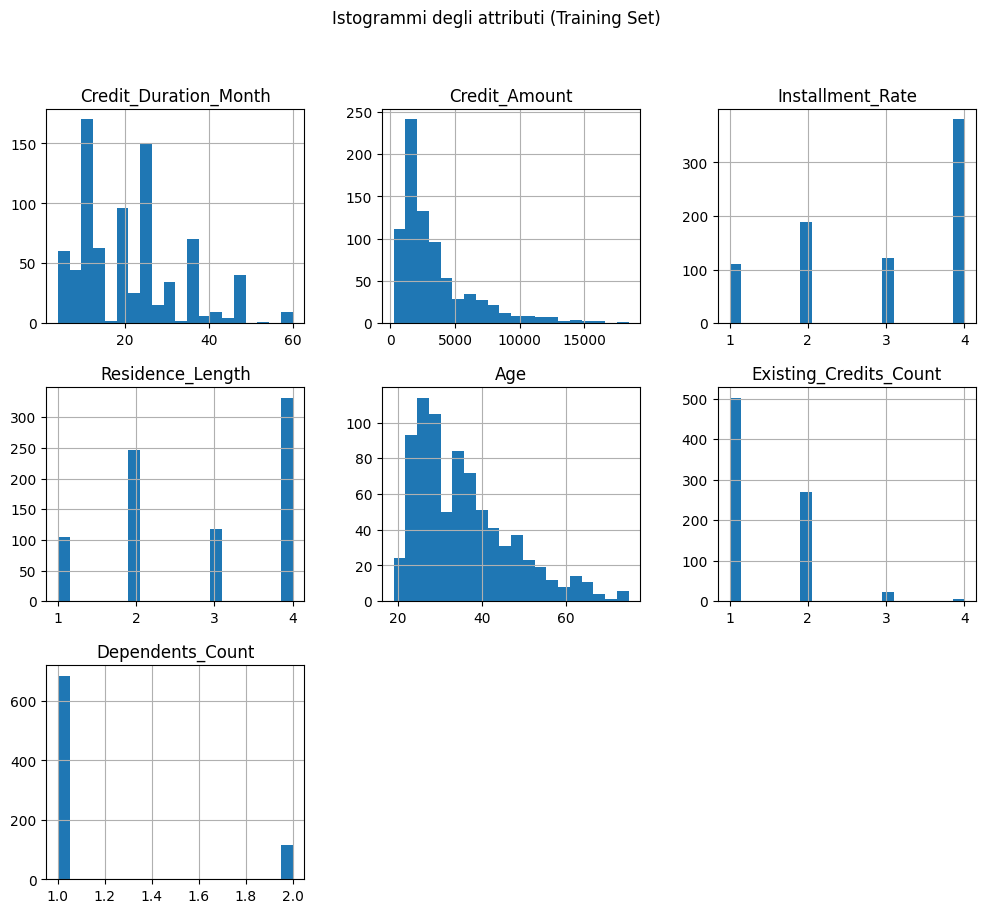

In [ ]:
"""
X_train.hist(figsize = (12, 10), bins=20):
  param:
    figsize(width = 12,height = 10)
    bins = 20 : specifica il numero di intervalli da usare per ogni istogramma.
"""
X_train.hist(figsize=(12, 10), bins=20)
plt.suptitle("Istogrammi degli attributi (Training Set)")
plt.show()

In [ ]:
# Lista delle colonne numeriche continue (da analisi precedente)
continuous_cols = ['Age', 'Credit_Amount']

# Lista delle colonne numeriche discrete/categoriche (da analisi precedente)
discrete_cols = ['Credit_Duration_Month', 'Existing_Credits_Count', 'Dependents_Count', 'Installment_Rate', 'Residence_Length']

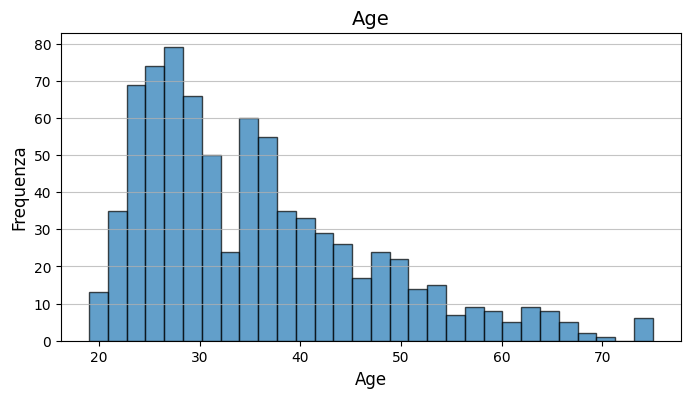

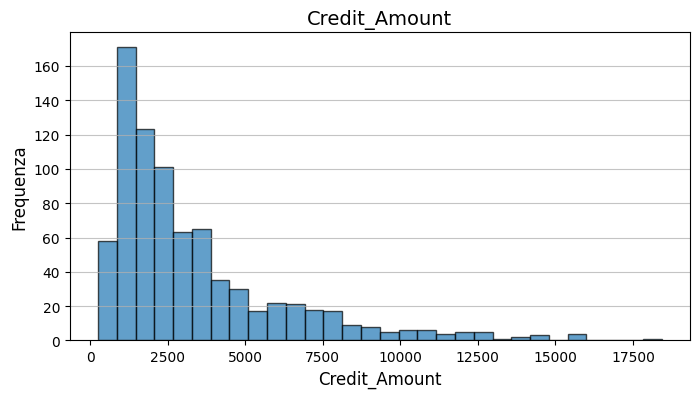

In [ ]:
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(X_train[col], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequenza", fontsize=12)
    plt.title(f"{col}", fontsize=14)
    plt.grid(axis='y', alpha=0.75)  # Griglia solo sull'asse y
    plt.show()


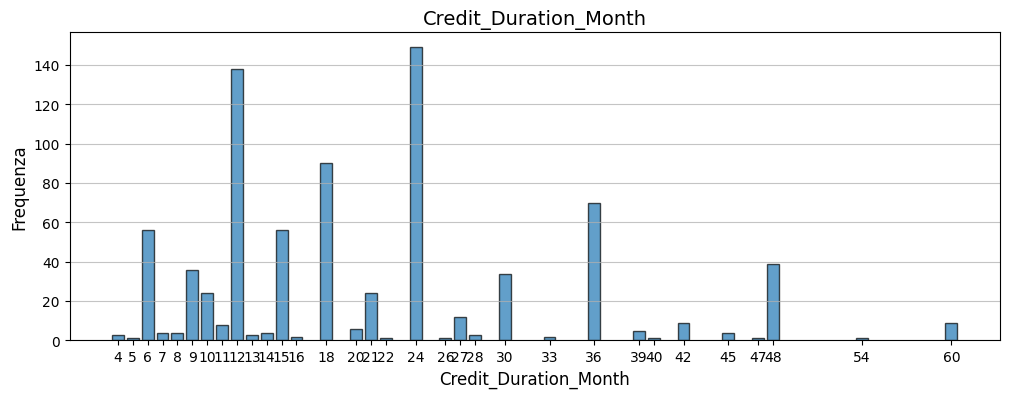

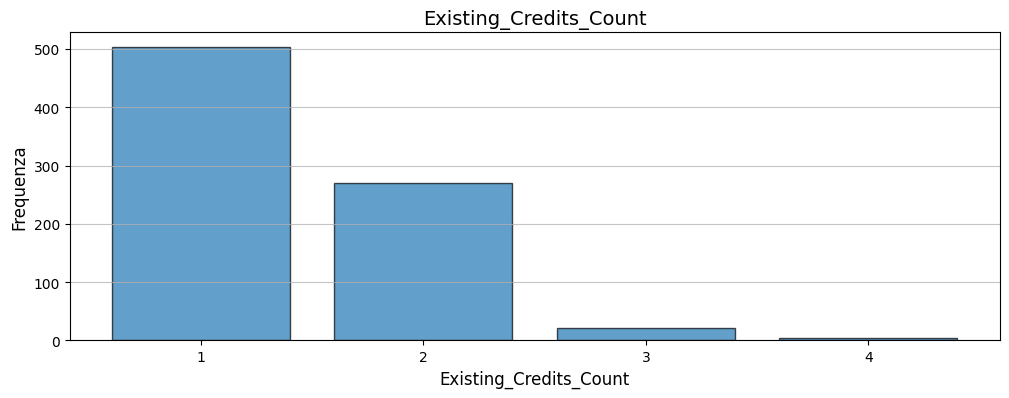

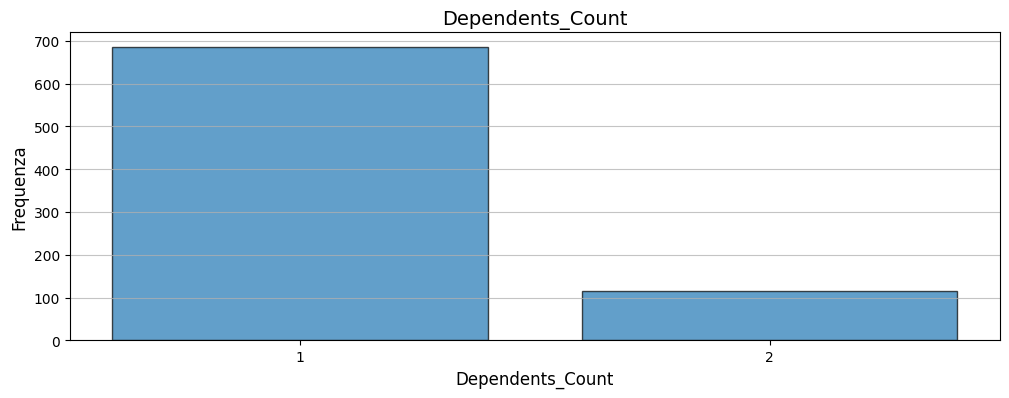

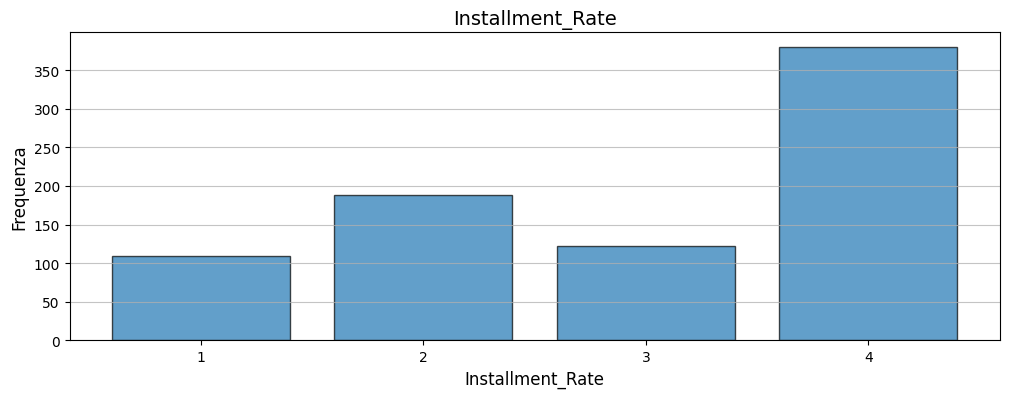

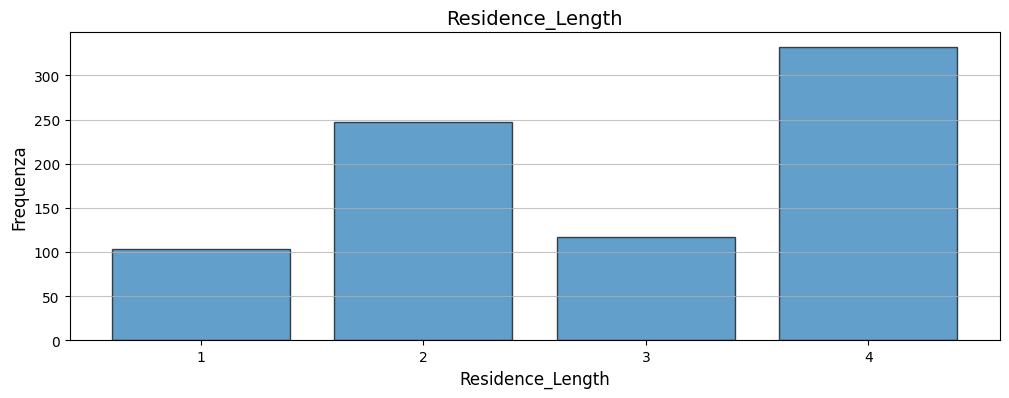

In [ ]:
for col in discrete_cols:
    plt.figure(figsize=(12, 4))
    # Calcola i valori unici e il loro conteggio.  Usa 'dropna=False' per includere ANCHE eventuali NaN
    counts = X_train[col].value_counts(dropna=False).sort_index()
    #Usa bar, e passa i conteggi direttamente.
    plt.bar(counts.index, counts.values, edgecolor='black', alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequenza", fontsize=12)
    plt.title(f"{col}", fontsize=14)
    plt.xticks(counts.index) #Mostra tutti i valori discreti sull'asse x.
    plt.grid(axis='y', alpha=0.75)
    plt.show()

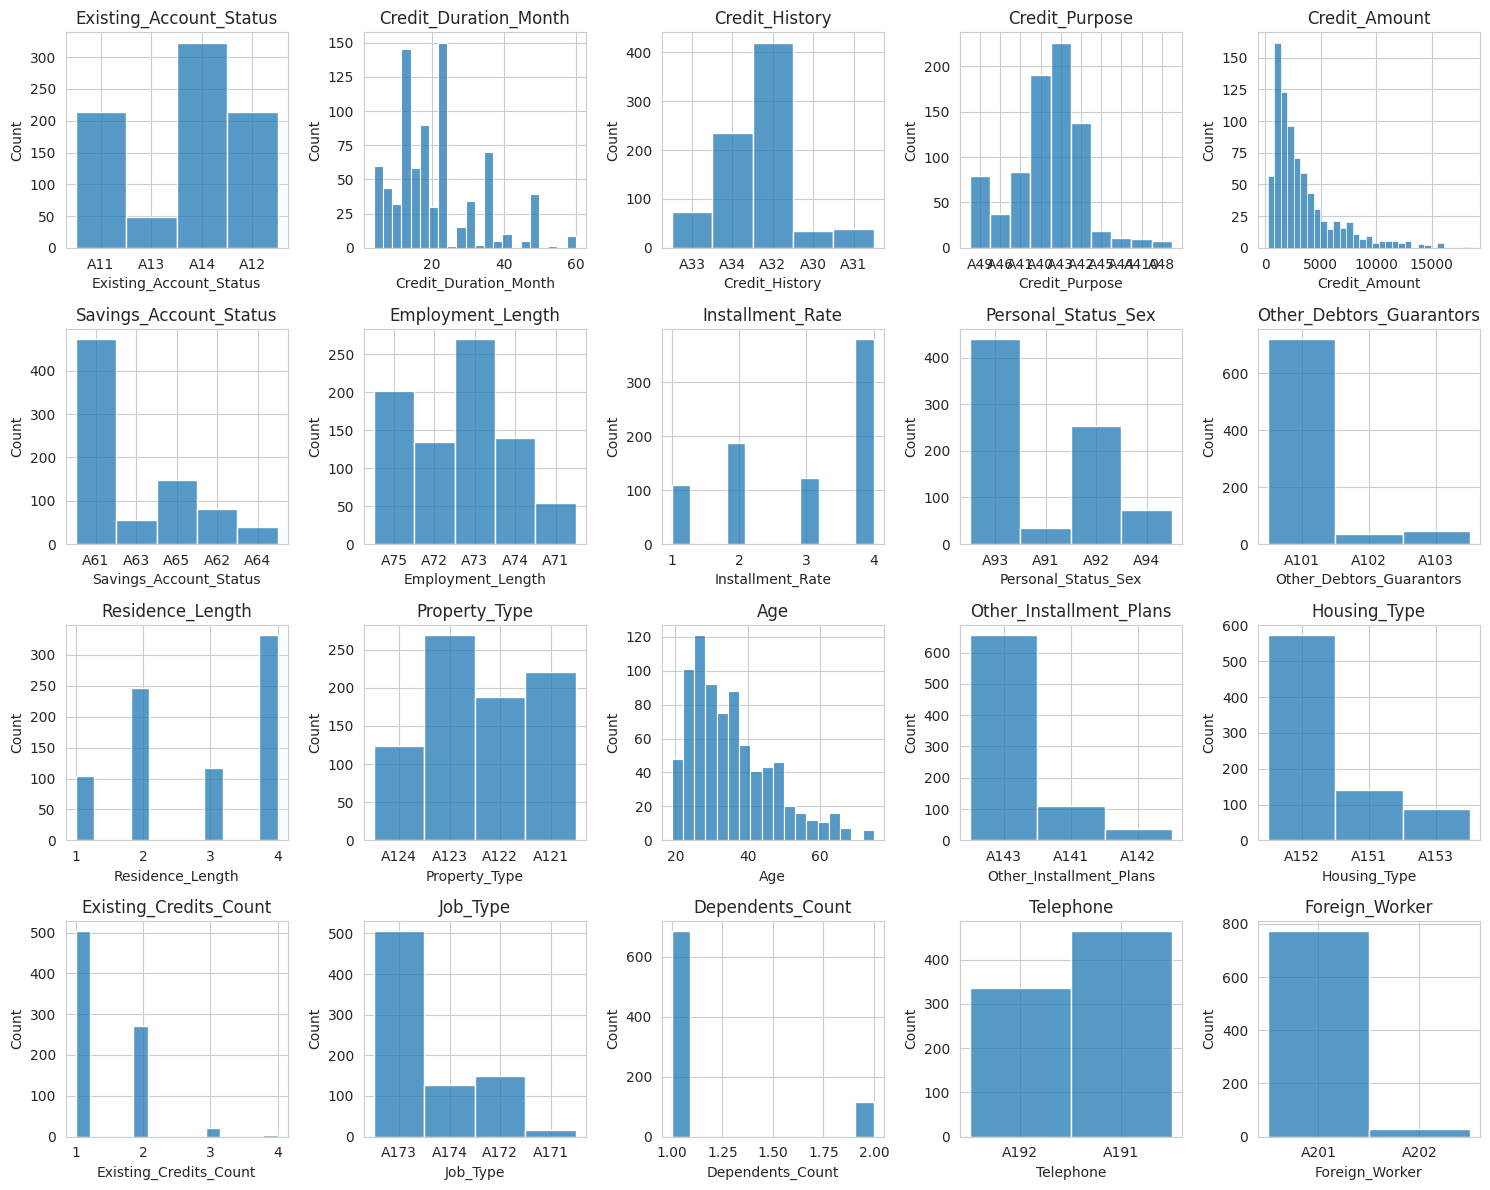

In [ ]:
# --- Istogrammi ---
# Imposta lo stile degli istogrammi (opzionale, ma rende i grafici più belli)
sns.set_style("whitegrid")

# Crea gli istogrammi per tutte le colonne numeriche
plt.figure(figsize=(15, 12))  # Imposta le dimensioni della figura
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 5, i + 1)  # Crea un subplot per ogni colonna (4 righe, 5 colonne)
    sns.histplot(X_train[column], kde=False)  # Crea l'istogramma
    plt.title(column)  # Imposta il titolo
    plt.tight_layout()  # Evita sovrapposizioni
plt.show()

In [ ]:
# Lista delle colonne categoriche (da analisi precedente)
categorical_cols = ['Status_Checking_Acc', 'Credit_History', 'Purpose',
                   'Savings_Acc', 'Years_Employed', 'Status_Sex',
                   'Other_Debtors_Guarantors', 'Property_Type',
                   'Other_Installment_Plans', 'Housing_Type', 'Job_Type',
                   'Telephone', 'Foreign_Worker']

# Analisi delle variabili categoriche
for col in categorical_cols:
    print(f"\n--- Colonna: {col} ---")

    # Conteggio dei valori distinti (incluse le modalità)
    print("\nConteggio valori distinti:")
    print(df[col].value_counts(dropna=False))

    # Visualizzazione con grafico a barre (solo se ci sono meno di 20 categorie)
    if df[col].nunique() <= 20:
        plt.figure(figsize=(8, 4))
        df[col].value_counts(dropna=False).sort_index().plot(kind='bar', edgecolor='black', alpha=0.7)
        plt.title(f"Distribuzione di {col}")
        plt.xlabel("Categoria")
        plt.ylabel("Frequenza")
        plt.xticks(rotation=45, ha="right")  # Ruota le etichette per leggibilità
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print("\n(Troppe categorie per visualizzare il grafico a barre)")


--- Colonna: Status_Checking_Acc ---

Conteggio valori distinti:


KeyError: 'Status_Checking_Acc'

In [ ]:
print("Valori mancanti per colonna (Training Set):")
print(X_train.isnull().sum())

Valori mancanti per colonna (Training Set):
Existing_Account_Status     0
Credit_Duration_Month       0
Credit_History              0
Credit_Purpose              0
Credit_Amount               0
Savings_Account_Status      0
Employment_Length           0
Installment_Rate            0
Personal_Status_Sex         0
Other_Debtors_Guarantors    0
Residence_Length            0
Property_Type               0
Age                         0
Other_Installment_Plans     0
Housing_Type                0
Existing_Credits_Count      0
Job_Type                    0
Dependents_Count            0
Telephone                   0
Foreign_Worker              0
dtype: int64


Non ci sono valori mancanti nelle colonne. In tal caso avremmo dovuto decidere se eliminare le righe o colonne ecc.

In [ ]:
print("Distribuzione della variabile target (Training Set):")
print(y_train.value_counts()) # Conteggio
print(y_train.value_counts(normalize=True))

Distribuzione della variabile target (Training Set):
Credit_Risk
1    559
2    241
Name: count, dtype: int64
Credit_Risk
1    0.69875
2    0.30125
Name: proportion, dtype: float64


Abbiamo un problema: La **classe 1** (69.9%) è molto più frequente della **classe 2**. Potrebbe succedere che il modello impari bene (alta accuratezza) la classe 1,al contrario sbagliando di frequente (basa accuratezza) l'altra classe.